#23Spring ECE 232E Project1
## Random Graphs and Random Walks

In [1]:
%load_ext rpy2.ipython

ERROR: ignored

In [2]:
install.packages("igraph")
install.packages("Matrix")
install.packages("pracma")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(igraph)
library(Matrix)
library(pracma)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




##1. Generating Random Networks

1(a)

In [ ]:
# create random graph
set.seed(0)

g1 = erdos.renyi.game(900, p=0.01, directed=FALSE)
# g2 = sample_gnp(n=500, p=0.01, directed=FALSE)
# create random graph with given degree sequence
# g3 = degree.sequence.game(rep(2,100))

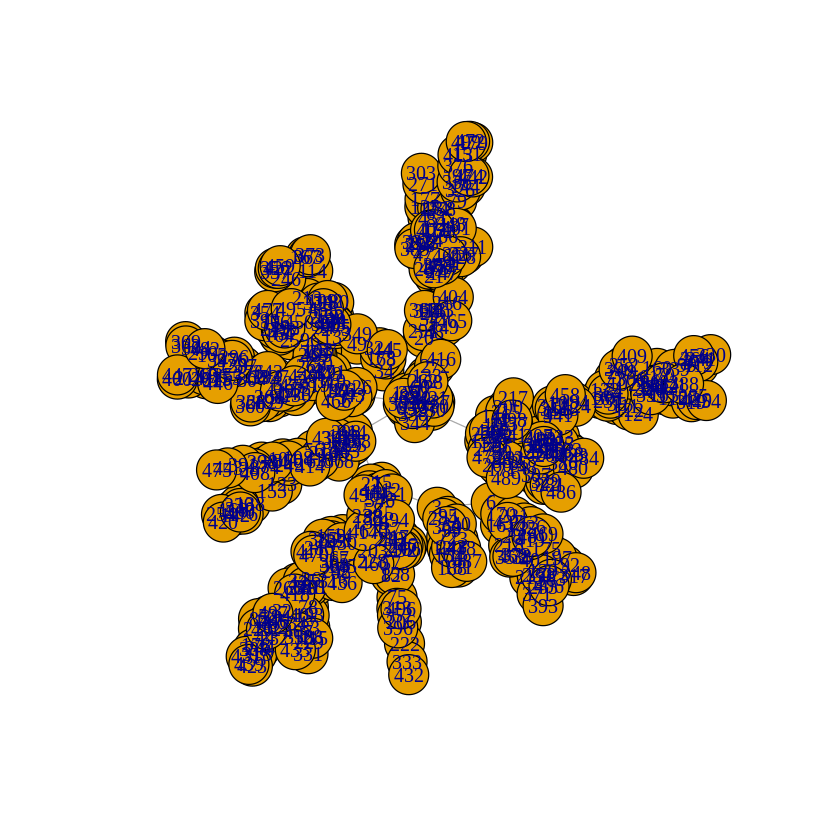

In [ ]:
plot(g1)

##2. Create networks using preferential attachment model

###2(a) Create an undirected network with n = 1050 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?

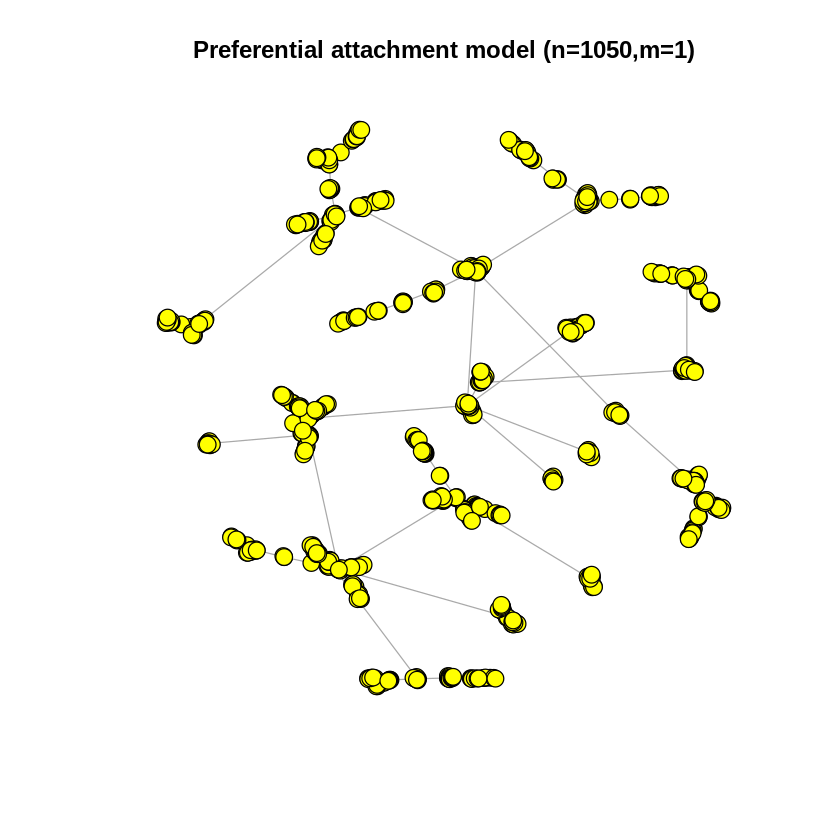

In [ ]:
# create random graph
set.seed(0) 
g1 = barabasi.game(1050, m=1, directed=F)
plot(g1, edge.arrow.size=.5, vertex.color="yellow", vertex.size=6, vertex.frame.color="black", vertex.label="", main ="Preferential attachment model (n=1050,m=1)")

In [ ]:
is.connected(g1)
vcount(g1)
ecount(g1)

[1] TRUE

[1] 1050

[1] 1049

###2(b) Use fast greedy method to find the community structure. Measure modularity. Define Assortativity. Compute Assortativity.

In [ ]:
fastgreedy.community(g1)

IGRAPH clustering fast greedy, groups: 33, mod: 0.94
+ groups:
  $`1`
   [1]   14   26   42   78   83  101  128  131  159  193  229  235  249  266
  [15]  286  315  331  345  347  351  358  385  402  407  411  415  418  430
  [29]  433  470  565  591  641  658  662  677  746  795  890  900  906  946
  [43]  954  988 1037
  
  $`2`
   [1]    2   15   27   41   58   88  134  136  140  203  228  238  346  412
  [15]  451  460  467  490  516  544  556  614  635  647  656  721  724  730
  [29]  768  796  820  832  834  903  914  935  971  996 1008 1024 1036
  + ... omitted several groups/vertices

In [ ]:
modularity(fastgreedy.community(g1))

[1] 0.9358261

In [ ]:
assortativity(g1, degree(g1))

[1] -0.09720639

###2(c) Try to generate a larger network with 10500 nodes using the same model. Compute modularity and assortativity. How is it compared to the smaller network's modularity?

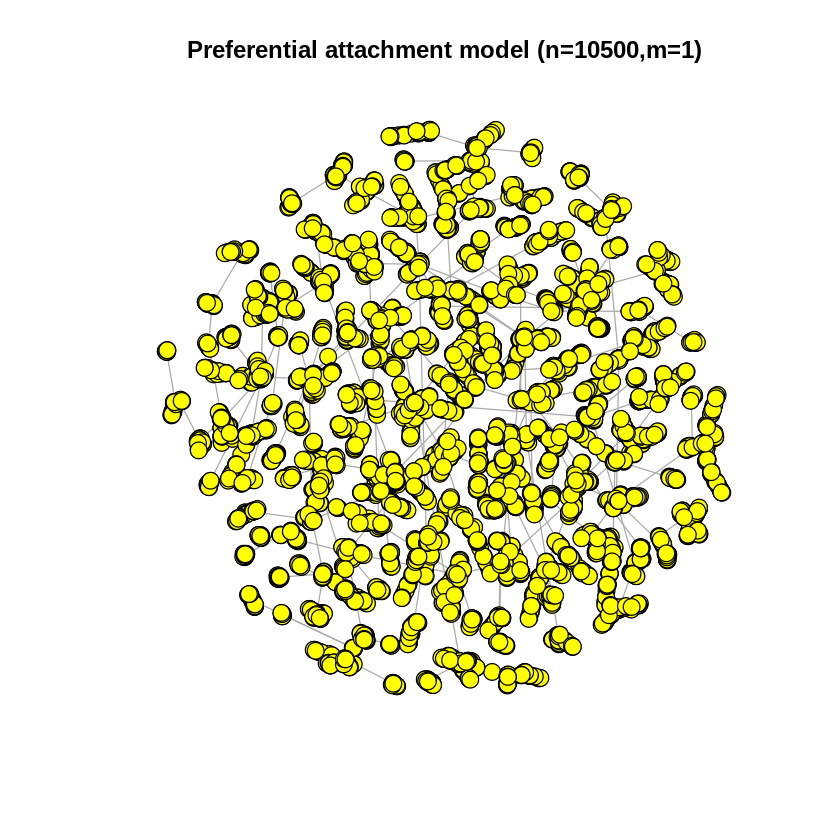

In [ ]:
# create random graph
set.seed(1)
g2 = barabasi.game(10500, m=1, directed=F)
plot(g2, edge.arrow.size=.5, vertex.color="yellow", vertex.size=6, vertex.frame.color="black", vertex.label="", main ="Preferential attachment model (n=10500,m=1)")

In [ ]:
fastgreedy.community(g2)

IGRAPH clustering fast greedy, groups: 111, mod: 0.98
+ groups:
  $`1`
    [1]    20    38   146   218   268   290   370   477   741   839   872   874
   [13]  1112  1192  1337  1345  1452  1493  1510  1748  1796  1816  1845  1852
   [25]  2002  2089  2097  2196  2228  2244  2347  2517  2802  2818  2827  2872
   [37]  3023  3039  3076  3238  3359  3396  3398  3511  3621  3725  3783  3811
   [49]  3853  3881  3923  4077  4089  4098  4197  4235  4314  4346  4449  4487
   [61]  4567  4592  4615  4665  4746  4760  4788  4800  4901  4940  4948  5053
   [73]  5109  5215  5258  5294  5305  5398  5411  5456  5500  5502  5516  5563
   [85]  5644  5754  5766  5785  5786  5809  5851  5863  5909  5924  6016  6031
   [97]  6045  6088  6106  6137  6231  6233  6234  6277  6328  6411  6610  6628
  + ... omitted several groups/vertices

In [ ]:
modularity(fastgreedy.community(g2))
assortativity(g2, degree(g2))

[1] 0.9786877

[1] -0.04667798

###2(d) Plot the degree distribution in a log-log scale for both n = 1050, 10500, then estimate the slope of the plot using linear regression.

The slope of the plot for (n= 1050 ,m=1) is -2.71941

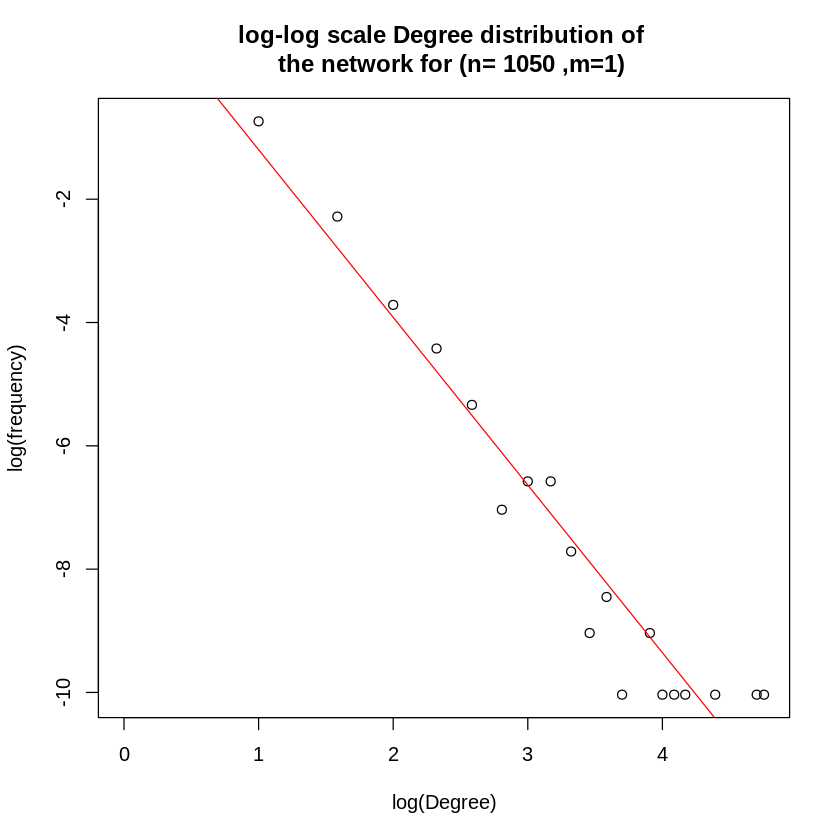

The slope of the plot for (n= 10500 ,m=1) is -2.942917

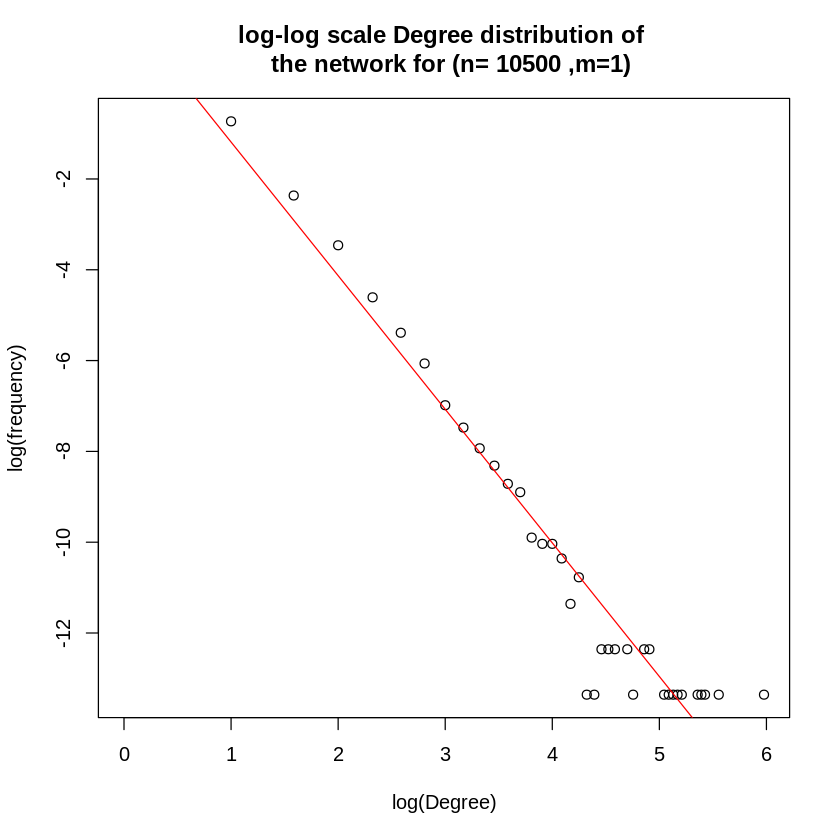

In [ ]:
#plot the degree distribution in a log-log scale
for(g in list(g1, g2)) {
  n <- vcount(g)
  # define the log of both degree and distribution
  degree <- log2(c(1:length(degree.distribution(g))))
  distri <- log2(degree.distribution(g))
  # here we need to eliminat some invalid value in distri
  invalid_idx <- is.infinite(distri)
  # create a data frame for linear regression
  ndata <- data.frame(x=degree, y=distri)[!invalid_idx,]
  
  # plot
  plot(degree, distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n,",m=1)"), xlab="log(Degree)",ylab="log(frequency)")
  
  # linear regression
  model <- lm(y~x, ndata)
  abline(model, col='red')
  slope <- coef(model)[2]
  cat("The slope of the plot for (n=",n,",m=1) is", slope)
}

###2(e) In the two networks generated in 2(a) and 2(c), perform the following: Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

The slope of the plot for (n= 1050 ,m=1) is -1.235629 


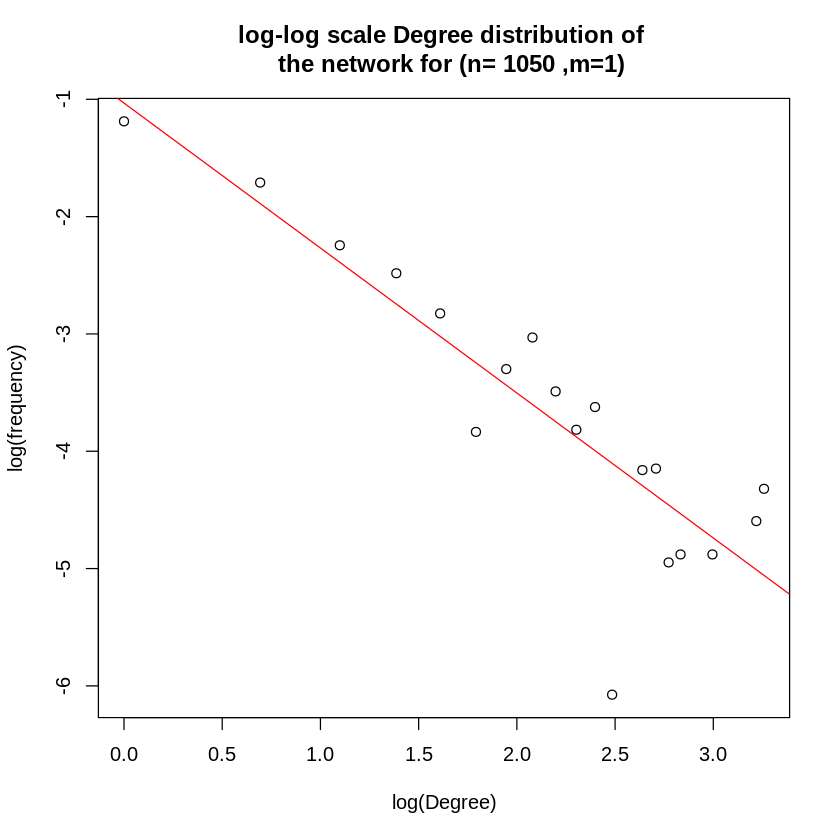

The slope of the plot for (n= 10500 ,m=1) is -1.460294

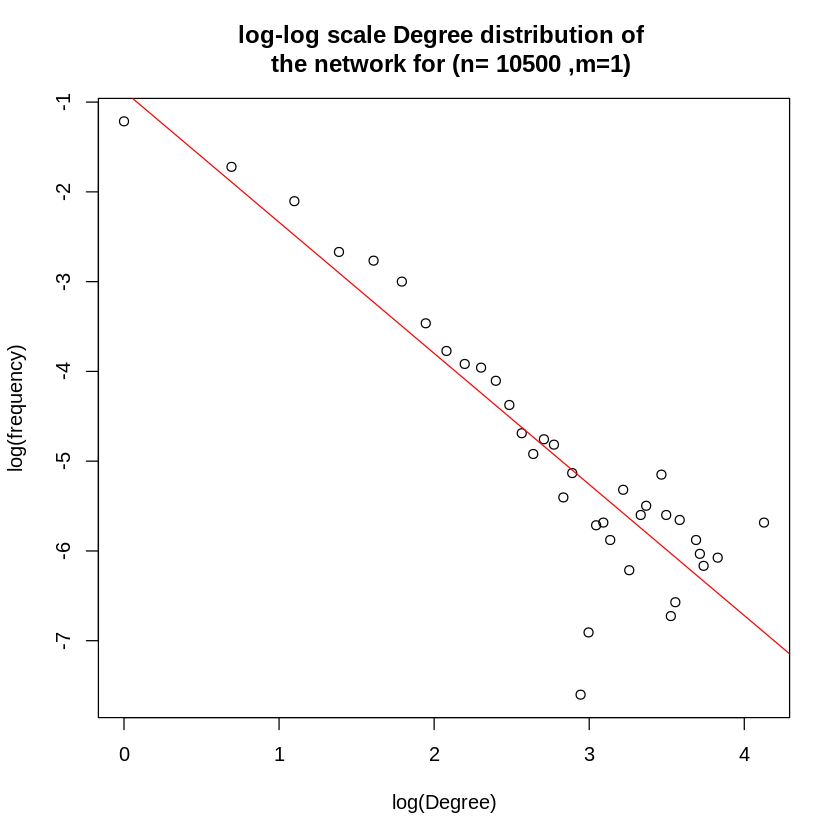

In [ ]:
# 1050
iterations <- 10000
g1degree <- c()
n1 <- vcount(g1)
for (i in 1:iterations){
  nodei <- sample(n1, 1)
  neighbor_nodes <- neighbors(g1, nodei)
  nodej <- sample(neighbor_nodes, 1)
  g1degree <- c(g1degree, degree(g1,v=nodej))
}
g1_degree <- as.data.frame(table(g1degree))



log_g1_degrees <- log(as.numeric(as.character(g1_degree$g1degree)))
log_g1_distri <- log(as.numeric(as.character(g1_degree$Freq/iterations)))
plot(log_g1_degrees, log_g1_distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n1,",m=1)"), xlab="log(Degree)",ylab="log(frequency)")
# linear regression
g1model <- lm(log_g1_distri~log_g1_degrees)
abline(g1model, col='red')
g1slope <- coef(g1model)[2]
cat("The slope of the plot for (n=",n1,",m=1) is", g1slope,"\n")

# 10500
g2degree <- c()
n2 <- vcount(g2)
for (i in 1:iterations){
  nodei <- sample(n2, 1)
  neighbor_nodes <- neighbors(g2, nodei)
  nodej <- sample(neighbor_nodes, 1)
  g2degree <- c(g2degree, degree(g2,v=nodej))
}
g2_degree <- as.data.frame(table(g2degree))



log_g2_degrees <- log(as.numeric(as.character(g2_degree$g2degree)))
log_g2_distri <- log(as.numeric(as.character(g2_degree$Freq/iterations)))
plot(log_g2_degrees, log_g2_distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n2,",m=1)"), xlab="log(Degree)",ylab="log(frequency)")
# linear regression
g2model <- lm(log_g2_distri~log_g2_degrees)
abline(g2model, col='red')
g2slope <- coef(g2model)[2]
cat("The slope of the plot for (n=",n2,",m=1) is", g2slope)


###2(f) Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1050. Show the relationship between the age of nodes and their expected degree through an appropriate plot. Note that the newest added node is the youngest.

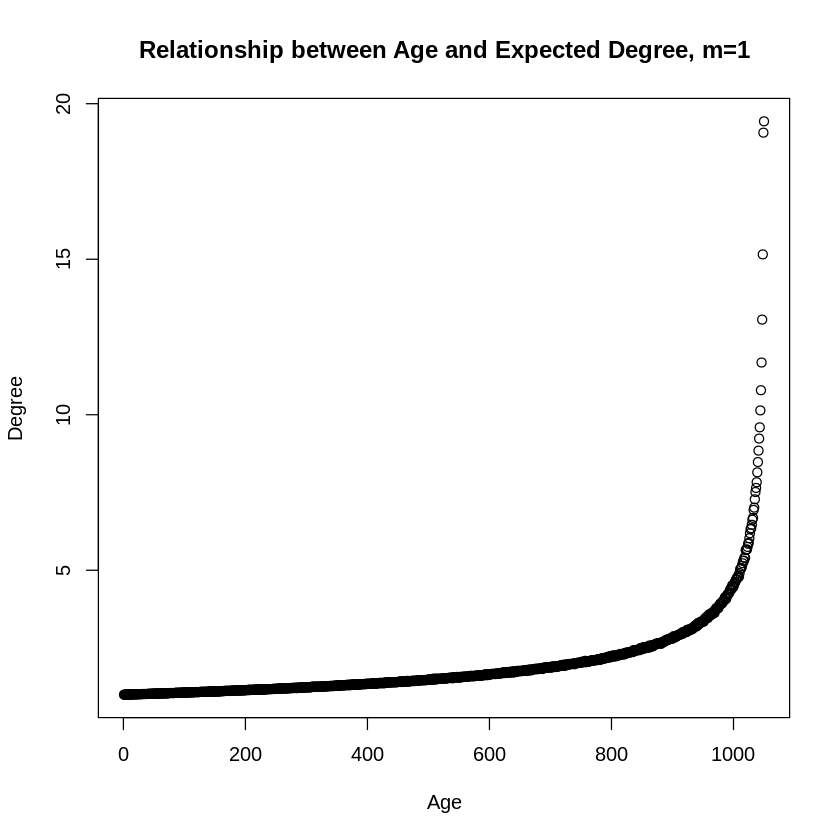

In [ ]:
iterations <- 10000
n <- 1050
m <- 1

degree_list <- integer(n)
age_list <- rev(seq(1:n))
for (i in 1:iterations) {
    g1050 = barabasi.game(n, m, directed=F)
    degree_list = degree_list + degree(g1050)
}
# compute the expeceted degree of a node
degree_list <- degree_list / iterations 

# plot(seq(1:n), degree_list, xlab="Time Step i", ylab="Degree")
# title(sprintf("Expected Degree at Time Step i, m=%.0f", m))

plot(age_list, degree_list, xlab="Age", ylab="Degree")
title(sprintf("Relationship between Age and Expected Degree, m=%.0f", m))

###2(g) Repeat the previous parts (a-f) for m = 2, and m = 6. Compare the results of each part for different values of m.

#### m=2, n=1050

[1] TRUE

[1] 1050

[1] 2097

IGRAPH clustering fast greedy, groups: 20, mod: 0.53
+ groups:
  $`1`
   [1]  102  164  170  209  216  227  231  241  256  278  286  322  323  345
  [15]  369  376  387  399  403  462  465  481  490  491  520  622  623  626
  [29]  628  723  741  748  754  757  769  781  795  801  805  810  818  827
  [43]  838  850  865  892  945  971 1018 1020 1024 1032 1037 1042
  
  $`2`
   [1]   44   48   53   61   72   90  124  147  171  172  182  193  196  212
  [15]  234  243  277  300  305  365  371  380  386  411  421  435  437  450
  [29]  483  516  544  565  571  633  647  670  678  681  684  700  711  714
  + ... omitted several groups/vertices

[1] 0.5275146

[1] -0.04357705

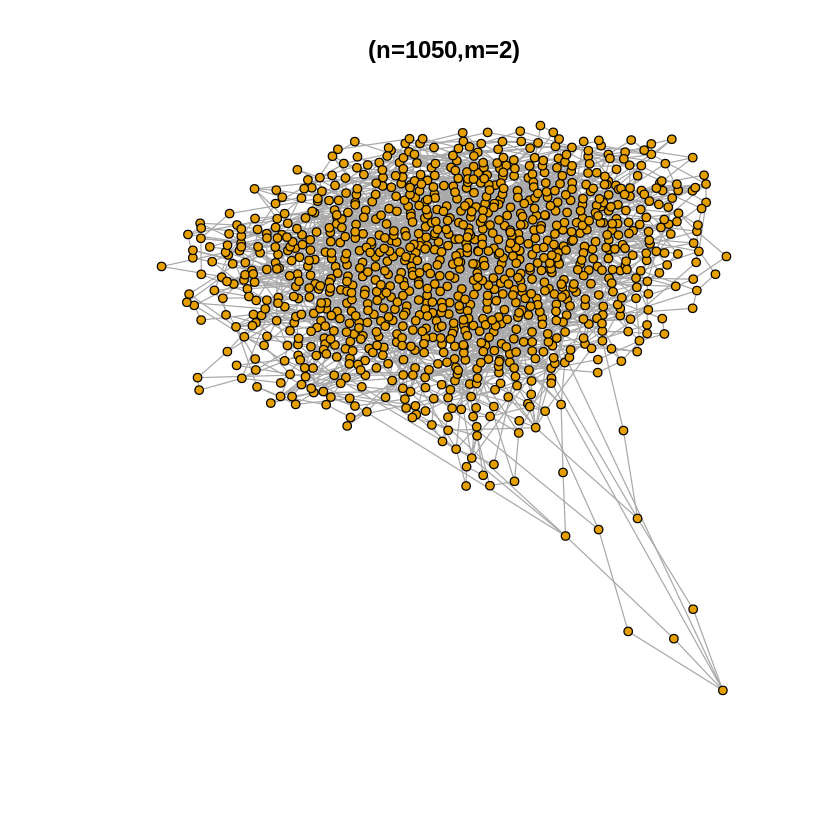

In [ ]:
# m=2, n=1050
set.seed(2) 
g3 = barabasi.game(1050, m=2, directed=F)
plot(g3, vertex.size=3, vertex.label="", main = "(n=1050,m=2)")
is.connected(g3)
vcount(g3)
ecount(g3)
fastgreedy.community(g3)
modularity(fastgreedy.community(g3))
assortativity(g3, degree(g3))

The slope of the plot for (n= 1050 ,m=2) is -2.137362

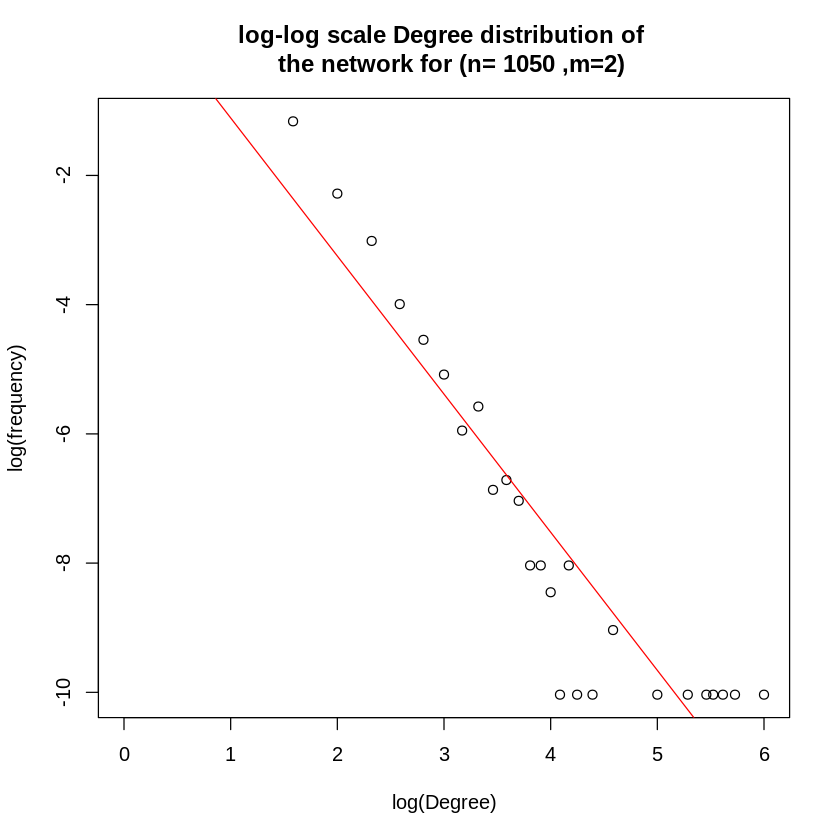

In [ ]:
#plot the degree distribution in a log-log scale
n3 <- vcount(g3)
# define the log of both degree and distribution
degree <- log2(c(1:length(degree.distribution(g3))))
distri <- log2(degree.distribution(g3))
# here we need to eliminat some invalid value in distri
invalid_idx <- is.infinite(distri)
# create a data frame for linear regression
ndata <- data.frame(x=degree, y=distri)[!invalid_idx,]
  
# plot
plot(degree, distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n3,",m=2)"), xlab="log(Degree)",ylab="log(frequency)")
  
# linear regression
model <- lm(y~x, ndata)
abline(model, col='red')
slope <- coef(model)[2]
cat("The slope of the plot for (n=",n,",m=2) is", slope)

The slope of the plot for (n= 1050 ,m=2) is -0.956969 


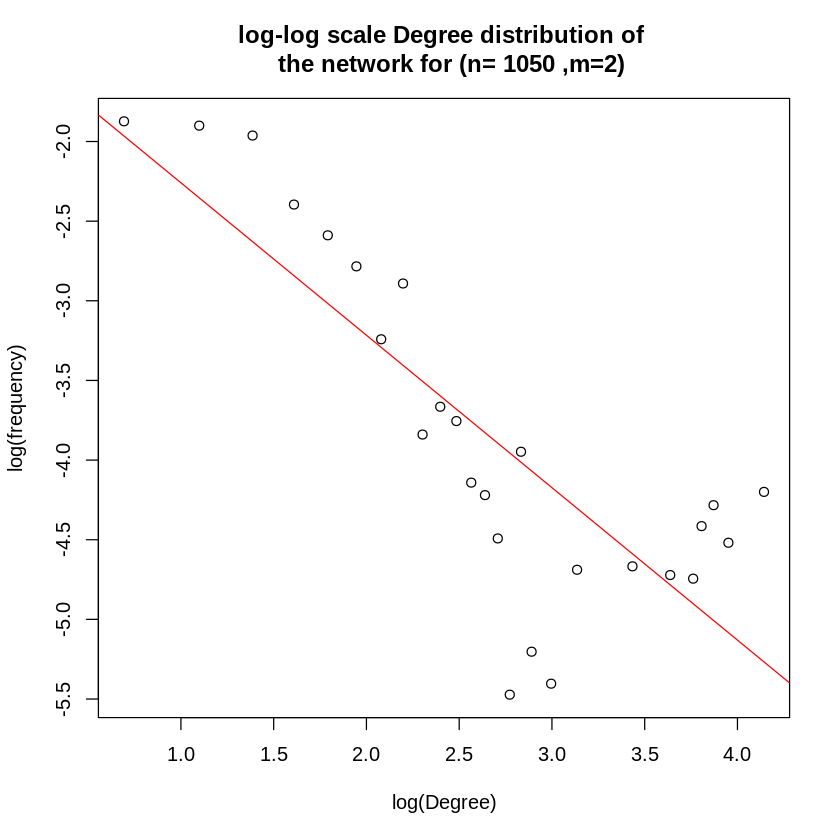

In [ ]:
# m=2, n=1050
iterations <- 10000
g3degree <- c()
n3 <- vcount(g3)
for (i in 1:iterations){
  nodei <- sample(n3, 1)
  neighbor_nodes <- neighbors(g3, nodei)
  nodej <- sample(neighbor_nodes, 1)
  g3degree <- c(g3degree, degree(g3,v=nodej))
}
g3_degree <- as.data.frame(table(g3degree))



log_g3_degrees <- log(as.numeric(as.character(g3_degree$g3degree)))
log_g3_distri <- log(as.numeric(as.character(g3_degree$Freq/iterations)))
plot(log_g3_degrees, log_g3_distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n3,",m=2)"), xlab="log(Degree)",ylab="log(frequency)")
# linear regression
g3model <- lm(log_g3_distri~log_g3_degrees)
abline(g3model, col='red')
g3slope <- coef(g3model)[2]
cat("The slope of the plot for (n=",n3,",m=2) is", g3slope,"\n")

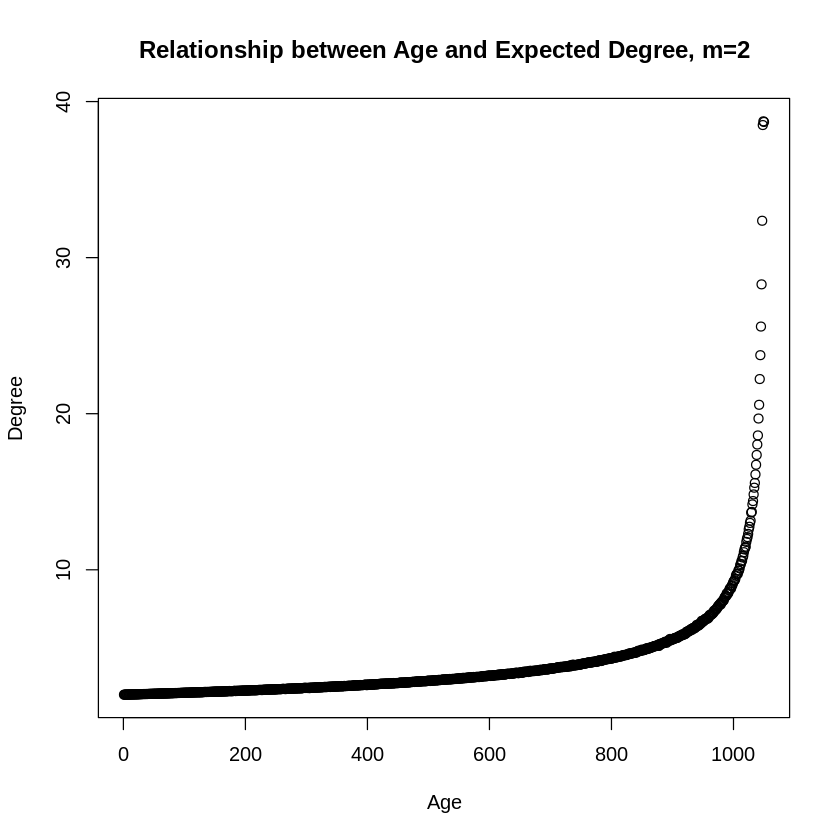

In [ ]:
degree_list = integer(1050)
age_list = rev(seq(1:1050))
for (i in 1:iterations) {
    g1050 = barabasi.game(1050, m=2, directed=F)
    degree_list = degree_list + degree(g1050)
}
degree_list = degree_list / iterations 
plot(age_list, degree_list, xlab="Age", ylab="Degree")
title(sprintf("Relationship between Age and Expected Degree, m=2"))

#### m=2, n=10500

[1] TRUE

[1] 10500

[1] 20997

IGRAPH clustering fast greedy, groups: 37, mod: 0.53
+ groups:
  $`1`
    [1]    35   134   288   506   643   771   778   867   885  1023  1058  1067
   [13]  1400  1584  1854  1868  1951  1960  2060  2073  2098  2297  2331  2587
   [25]  2740  2883  3213  3232  3294  3311  3477  3664  3766  3775  3776  3791
   [37]  3837  3888  3965  4428  4524  4538  4592  4865  4927  4990  4995  5116
   [49]  5174  5185  5273  5352  5382  5584  5660  5686  5760  5813  5876  5950
   [61]  6038  6123  6129  6132  6308  6449  6692  6709  6963  6972  6988  7080
   [73]  7152  7424  7448  7502  7609  7633  7667  7749  7782  7818  7921  8274
   [85]  8383  8435  8476  8497  8616  8624  8647  8750  8766  8826  8982  8988
   [97]  9134  9153  9165  9205  9206  9219  9386  9529  9740  9827  9832  9921
  + ... omitted several groups/vertices

[1] 0.5327102

[1] -0.004302757

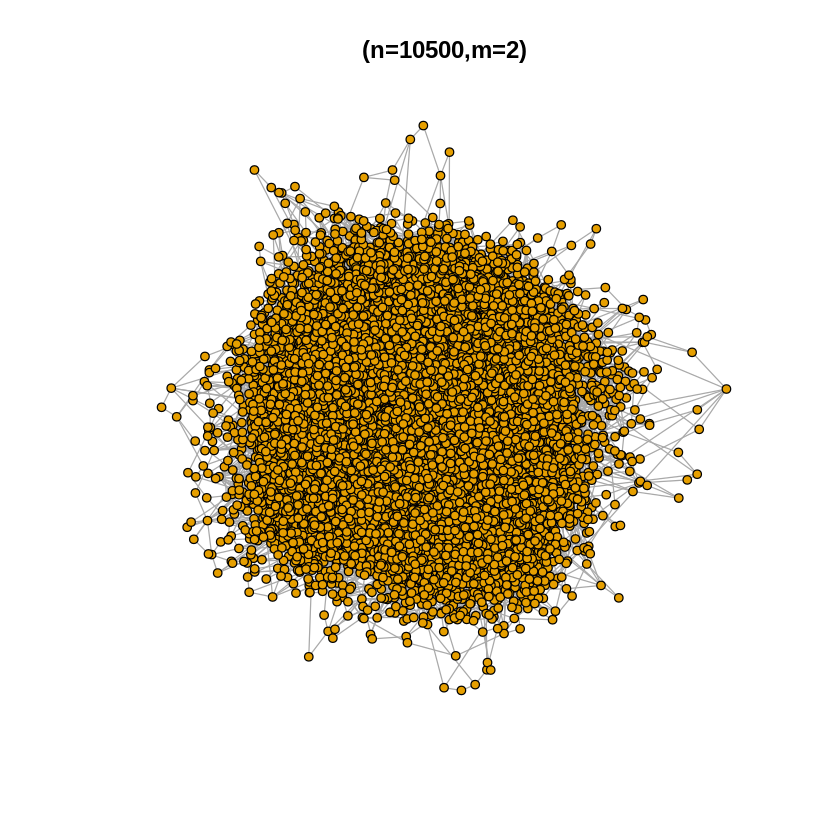

In [ ]:
# m=2, n=10500
set.seed(2) 
g4 = barabasi.game(10500, m=2, directed=F)
plot(g4, vertex.size=3, vertex.label="", main = "(n=10500,m=2)")
is.connected(g4)
vcount(g4)
ecount(g4)
fastgreedy.community(g4)
modularity(fastgreedy.community(g4))
assortativity(g4, degree(g4))

The slope of the plot for (n= 10500 ,m=2) is -2.425436

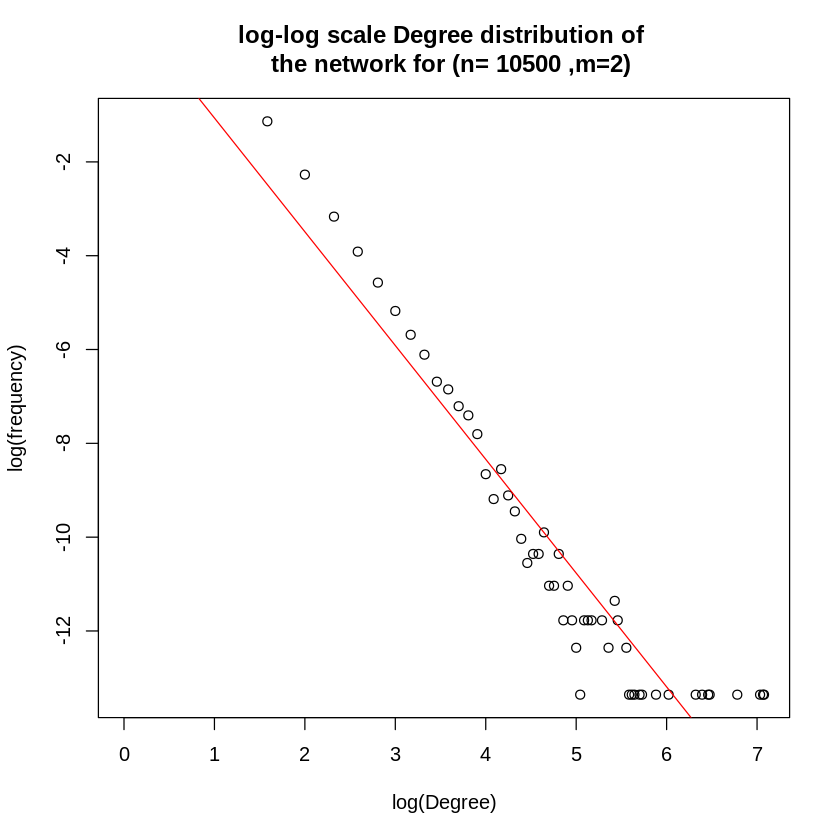

In [ ]:
#plot the degree distribution in a log-log scale
n4 <- vcount(g4)
# define the log of both degree and distribution
degree <- log2(c(1:length(degree.distribution(g4))))
distri <- log2(degree.distribution(g4))
# here we need to eliminat some invalid value in distri
invalid_idx <- is.infinite(distri)
# create a data frame for linear regression
ndata <- data.frame(x=degree, y=distri)[!invalid_idx,]
  
# plot
plot(degree, distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n4,",m=2)"), xlab="log(Degree)",ylab="log(frequency)")
  
# linear regression
model <- lm(y~x, ndata)
abline(model, col='red')
slope <- coef(model)[2]
cat("The slope of the plot for (n=",n4,",m=2) is", slope)

The slope of the plot for (n= 10500 ,m=2) is -1.288756 


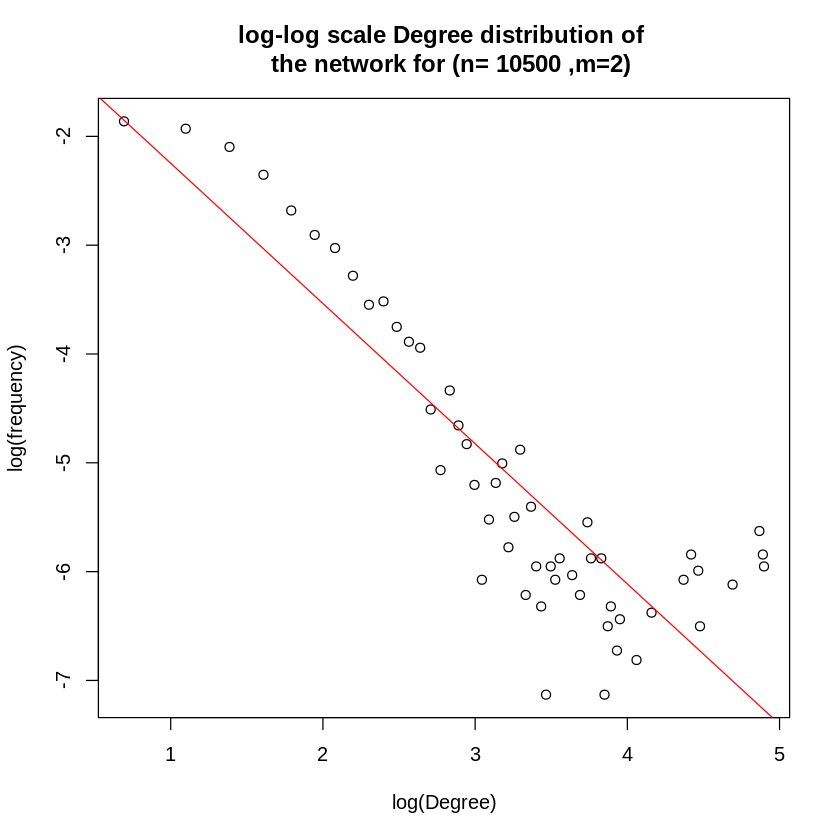

In [ ]:
iterations <- 10000
g4degree <- c()
n4 <- vcount(g4)
for (i in 1:iterations){
  nodei <- sample(n4, 1)
  neighbor_nodes <- neighbors(g4, nodei)
  nodej <- sample(neighbor_nodes, 1)
  g4degree <- c(g4degree, degree(g4,v=nodej))
}
g4_degree <- as.data.frame(table(g4degree))



log_g4_degrees <- log(as.numeric(as.character(g4_degree$g4degree)))
log_g4_distri <- log(as.numeric(as.character(g4_degree$Freq/iterations)))
plot(log_g4_degrees, log_g4_distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n4,",m=2)"), xlab="log(Degree)",ylab="log(frequency)")
# linear regression
g4model <- lm(log_g4_distri~log_g4_degrees)
abline(g4model, col='red')
g4slope <- coef(g4model)[2]
cat("The slope of the plot for (n=",n4,",m=2) is", g4slope,"\n")

#### m=6, n=1050

[1] TRUE

[1] 1050

[1] 6279

IGRAPH clustering fast greedy, groups: 9, mod: 0.25
+ groups:
  $`1`
   [1]   38   70   71   99  134  146  156  180  183  226  250  258  263  274
  [15]  277  282  284  289  292  301  307  315  324  348  375  377  384  401
  [29]  402  403  408  414  416  438  444  451  484  528  538  556  566  567
  [43]  586  608  614  622  652  654  661  664  681  685  686  696  702  707
  [57]  710  716  731  738  747  759  763  771  775  777  781  788  806  809
  [71]  855  871  879  880  883  887  896  905  908  914  917  927  930  932
  [85]  935  939  962  964  979  980  981 1002 1005 1033 1048
  
  $`2`
  + ... omitted several groups/vertices

[1] 0.2465457

[1] -0.003481485

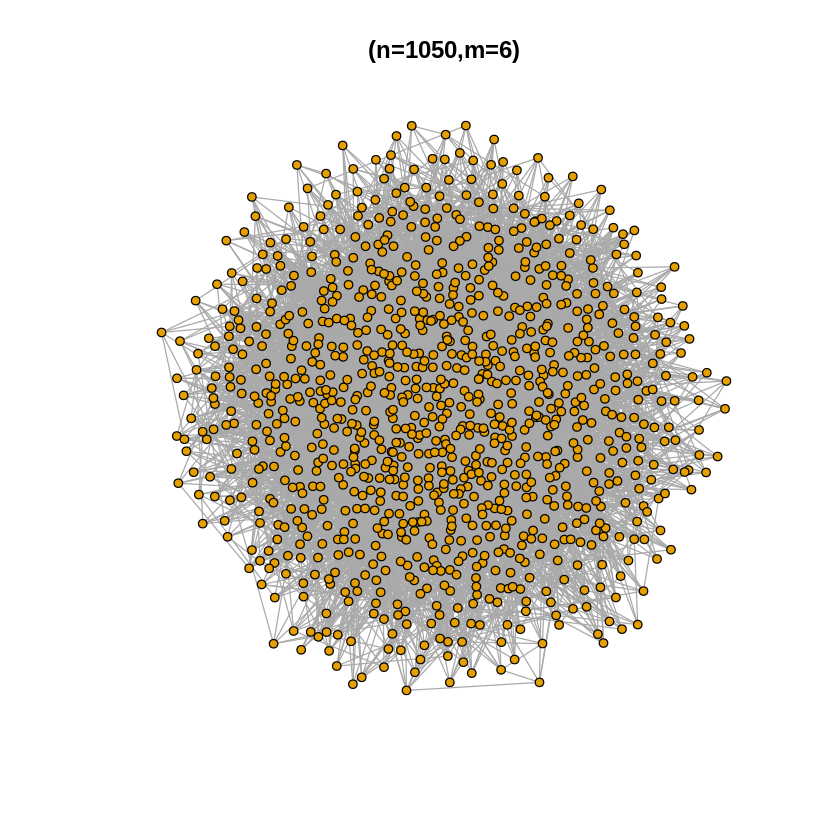

In [ ]:
# m=6, n=1050
set.seed(2) 
g5 = barabasi.game(1050, m=6, directed=F)
plot(g5, vertex.size=3, vertex.label="", main = "(n=1050,m=6)")
is.connected(g5)
vcount(g5)
ecount(g5)
fastgreedy.community(g5)
modularity(fastgreedy.community(g5))
assortativity(g5, degree(g5))

The slope of the plot for (n= 1050 ,m=6) is -2.026279

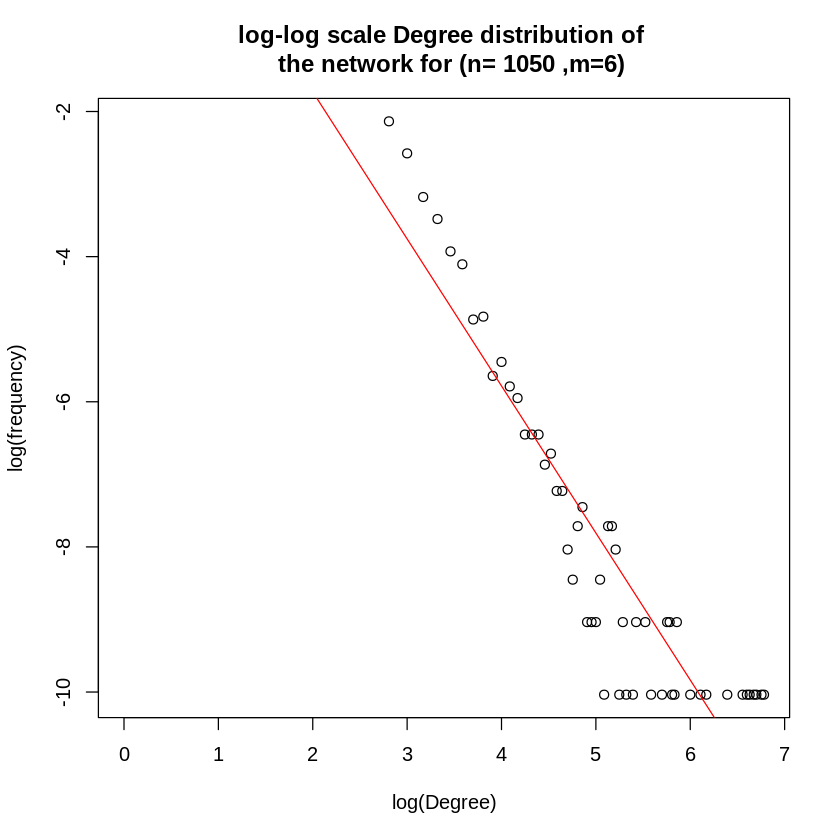

In [ ]:
#plot the degree distribution in a log-log scale
n5 <- vcount(g5)
# define the log of both degree and distribution
degree <- log2(c(1:length(degree.distribution(g5))))
distri <- log2(degree.distribution(g5))
# here we need to eliminat some invalid value in distri
invalid_idx <- is.infinite(distri)
# create a data frame for linear regression
ndata <- data.frame(x=degree, y=distri)[!invalid_idx,]
  
# plot
plot(degree, distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n5,",m=6)"), xlab="log(Degree)",ylab="log(frequency)")
  
# linear regression
model <- lm(y~x, ndata)
abline(model, col='red')
slope <- coef(model)[2]
cat("The slope of the plot for (n=",n5,",m=6) is", slope)

The slope of the plot for (n= 1050 ,m=6) is -0.9424131 


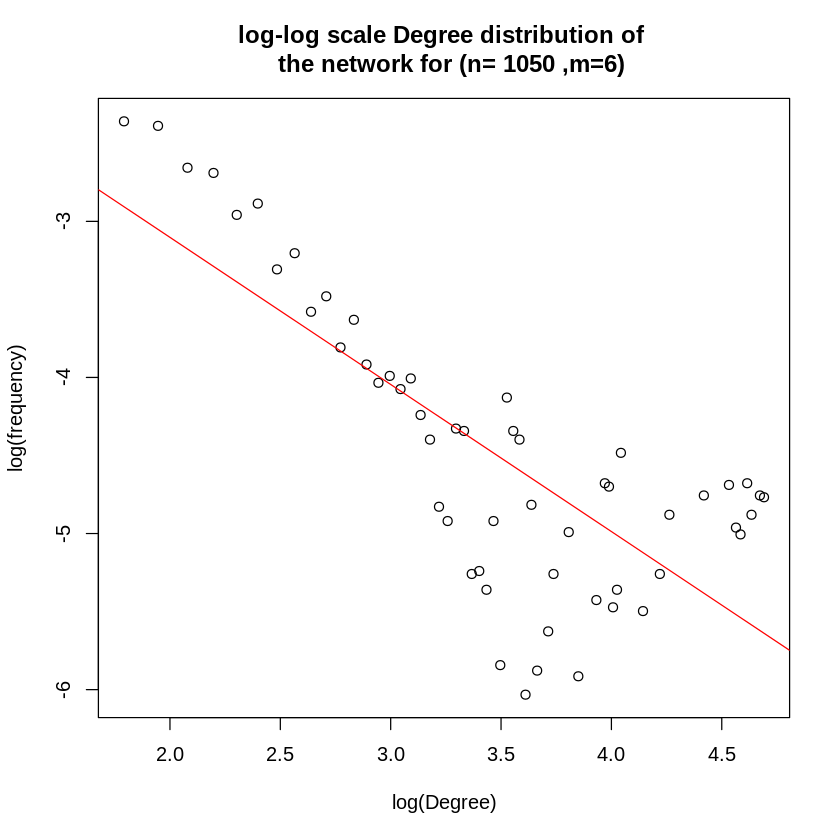

In [ ]:
# m=6, n=1050
iterations <- 10000
g5degree <- c()
n5 <- vcount(g5)
for (i in 1:iterations){
  nodei <- sample(n5, 1)
  neighbor_nodes <- neighbors(g5, nodei)
  nodej <- sample(neighbor_nodes, 1)
  g5degree <- c(g5degree, degree(g5,v=nodej))
}
g5_degree <- as.data.frame(table(g5degree))



log_g5_degrees <- log(as.numeric(as.character(g5_degree$g5degree)))
log_g5_distri <- log(as.numeric(as.character(g5_degree$Freq/iterations)))
plot(log_g5_degrees, log_g5_distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n5,",m=6)"), xlab="log(Degree)",ylab="log(frequency)")
# linear regression
g5model <- lm(log_g5_distri~log_g5_degrees)
abline(g5model, col='red')
g5slope <- coef(g5model)[2]
cat("The slope of the plot for (n=",n5,",m=6) is", g5slope,"\n")

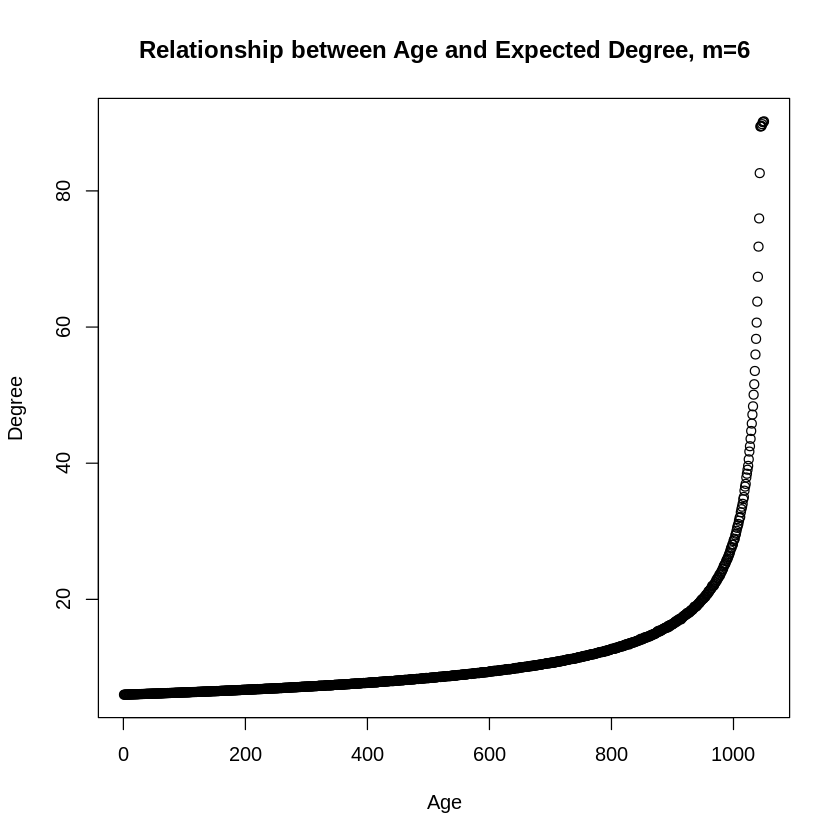

In [ ]:

degree_list = integer(1050)
age_list = rev(seq(1:1050))
for (i in 1:iterations) {
    g1050 = barabasi.game(1050, m=6, directed=F)
    degree_list = degree_list + degree(g1050)
}
# compute the expeceted degree of a node
degree_list = degree_list / iterations 

plot(age_list, degree_list, xlab="Age", ylab="Degree")
title(sprintf("Relationship between Age and Expected Degree, m=%.0f", m))


#### m=6, n=10500

[1] TRUE

[1] 10500

[1] 62979

IGRAPH clustering fast greedy, groups: 12, mod: 0.25
+ groups:
  $`1`
    [1]   166   181   267   361   421   445   466   616   626   646   705   716
   [13]   740   753   776   840   891   910   933   947  1018  1038  1047  1050
   [25]  1080  1222  1297  1345  1471  1494  1522  1530  1551  1678  1689  1695
   [37]  1717  1727  1766  1994  2066  2084  2087  2097  2101  2118  2159  2161
   [49]  2171  2215  2230  2270  2424  2440  2468  2475  2503  2522  2544  2551
   [61]  2569  2587  2639  2722  2749  2795  2817  2827  2833  2856  2872  2875
   [73]  2917  2999  3012  3029  3080  3158  3175  3231  3309  3318  3323  3343
   [85]  3353  3360  3380  3421  3453  3457  3465  3477  3494  3573  3629  3698
   [97]  3728  3743  3768  3777  3801  3872  3914  3928  3929  3948  3957  4040
  + ... omitted several groups/vertices

[1] 0.2465971

[1] -0.001375021

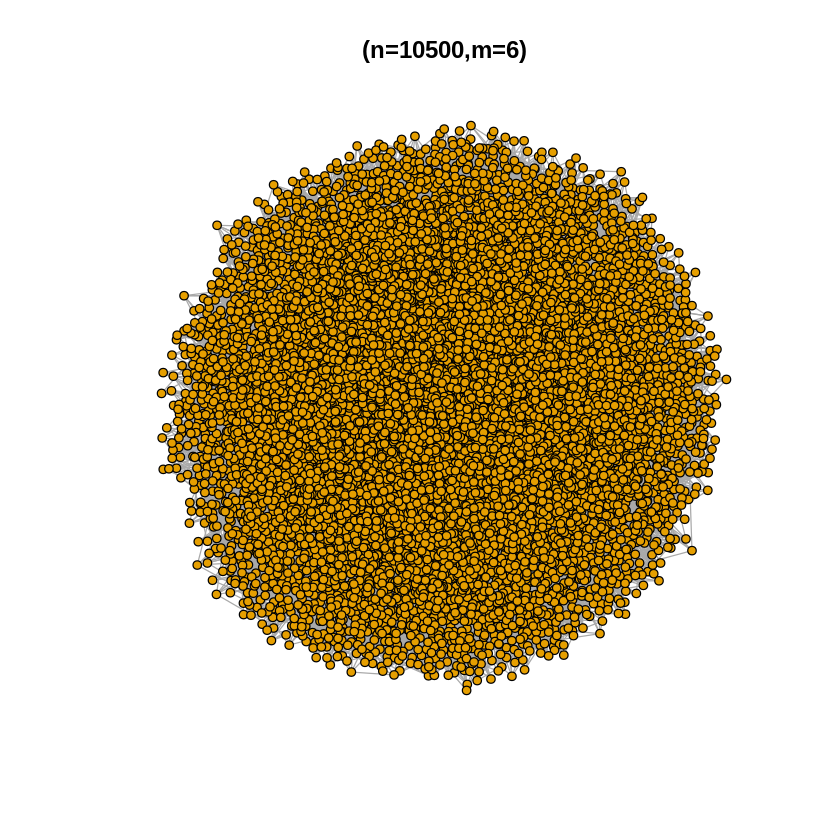

In [ ]:
# m=6, n=10500
set.seed(2) 
g6 = barabasi.game(10500, m=6, directed=F)
plot(g6, vertex.size=3, vertex.label="", main = "(n=10500,m=6)")
is.connected(g6)
vcount(g6)
ecount(g6)
fastgreedy.community(g6)
modularity(fastgreedy.community(g6))
assortativity(g6, degree(g6))

The slope of the plot for (n= 10500 ,m=6) is -2.170393

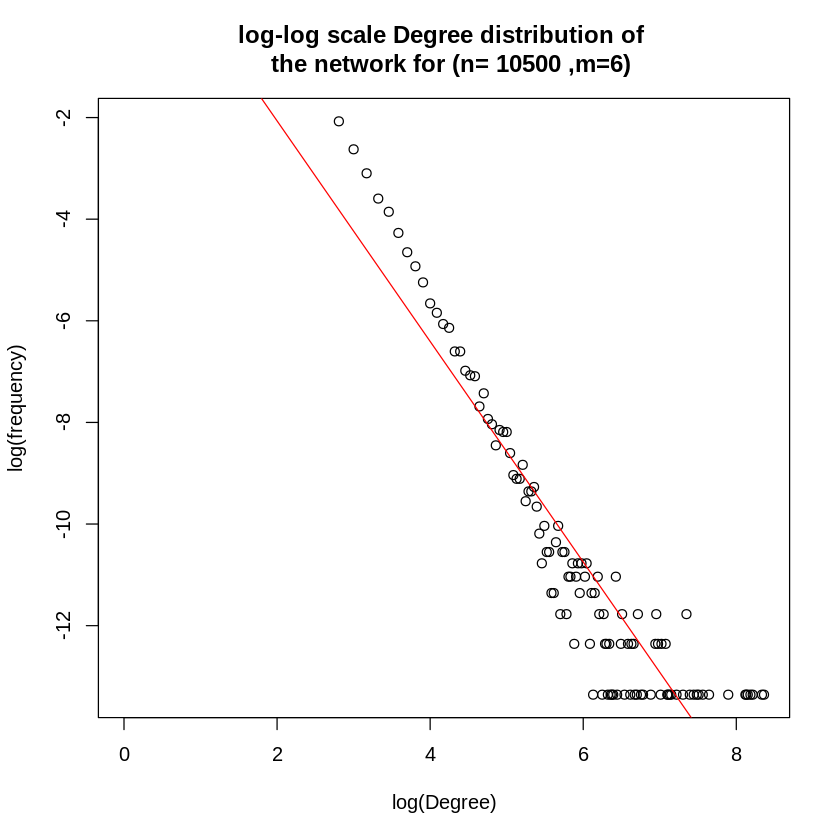

In [ ]:
#plot the degree distribution in a log-log scale
n6 <- vcount(g6)
# define the log of both degree and distribution
degree <- log2(c(1:length(degree.distribution(g6))))
distri <- log2(degree.distribution(g6))
# here we need to eliminat some invalid value in distri
invalid_idx <- is.infinite(distri)
# create a data frame for linear regression
ndata <- data.frame(x=degree, y=distri)[!invalid_idx,]
  
# plot
plot(degree, distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n6,",m=6)"), xlab="log(Degree)",ylab="log(frequency)")
  
# linear regression
model <- lm(y~x, ndata)
abline(model, col='red')
slope <- coef(model)[2]
cat("The slope of the plot for (n=",n6,",m=6) is", slope)

The slope of the plot for (n= 10500 ,m=6) is -1.098642 


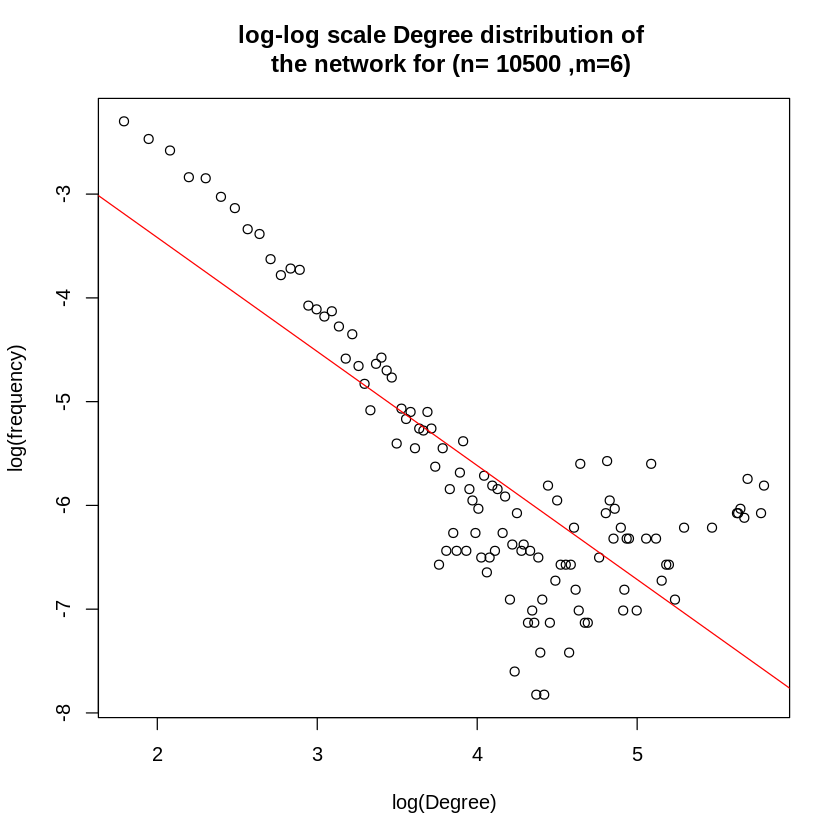

In [ ]:
iterations <- 10000
g6degree <- c()
n6 <- vcount(g6)
for (i in 1:iterations){
  nodei <- sample(n6, 1)
  neighbor_nodes <- neighbors(g6, nodei)
  nodej <- sample(neighbor_nodes, 1)
  g6degree <- c(g6degree, degree(g6,v=nodej))
}
g6_degree <- as.data.frame(table(g6degree))



log_g6_degrees <- log(as.numeric(as.character(g6_degree$g6degree)))
log_g6_distri <- log(as.numeric(as.character(g6_degree$Freq/iterations)))
plot(log_g6_degrees, log_g6_distri, main=paste("log-log scale Degree distribution of 
  the network for (n=",n6,",m=6)"), xlab="log(Degree)",ylab="log(frequency)")
# linear regression
g6model <- lm(log_g6_distri~log_g6_degrees)
abline(g6model, col='red')
g6slope <- coef(g6model)[2]
cat("The slope of the plot for (n=",n6,",m=6) is", g6slope,"\n")

###2(h) Again, generate a preferential attachment network with n = 1050, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks. Hint In case that fastgreedy community detection fails because of self-loops, you may use “walktrap” community detection.

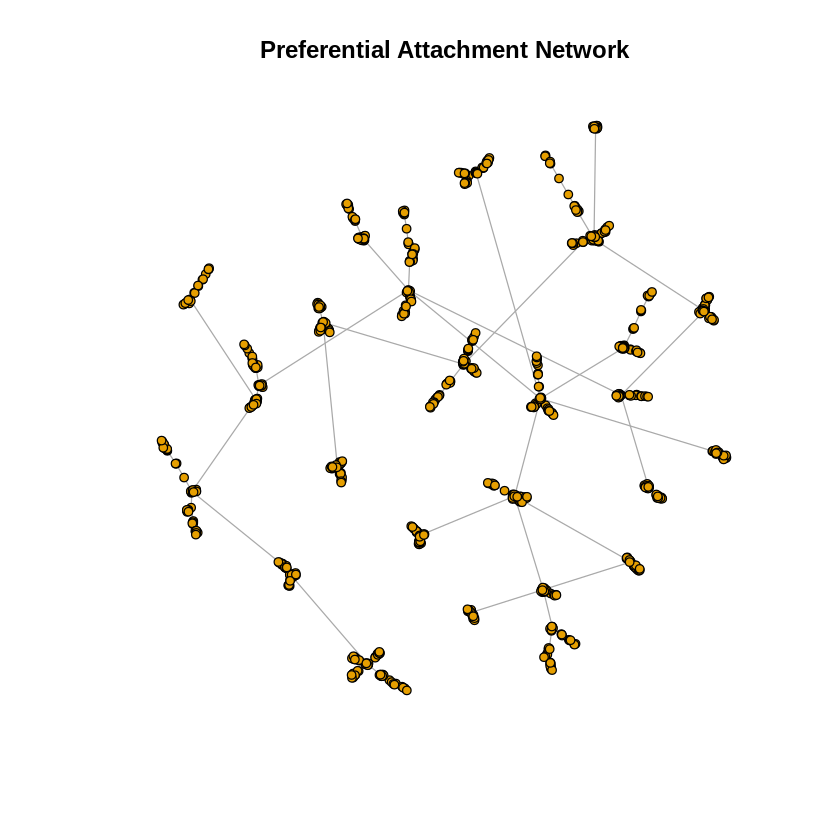

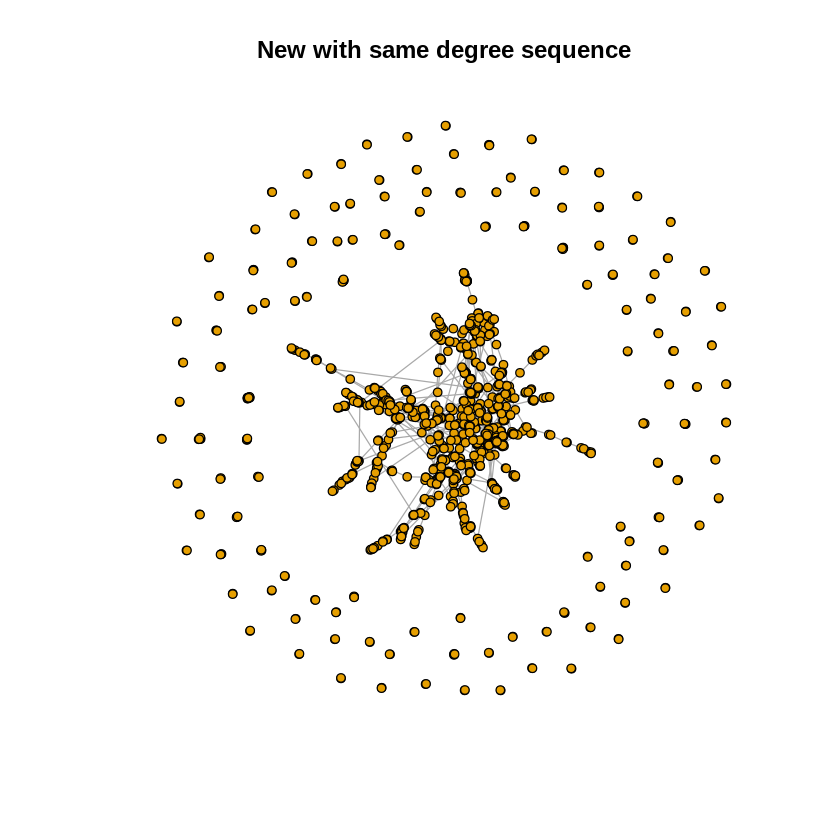

In [4]:
set.seed(1)
gh = barabasi.game(1050, m=1, directed = F)
gh_degree_seq <- degree(gh)
# print(gh_degree_seq)
g_new <- sample_degseq(gh_degree_seq, method = "simple.no.multiple")
set.seed(1)
plot(gh, vertex.size=3, vertex.label="", main="Preferential Attachment Network")
set.seed(1)
plot(g_new, vertex.size=3, vertex.label="", main="New with same degree sequence")


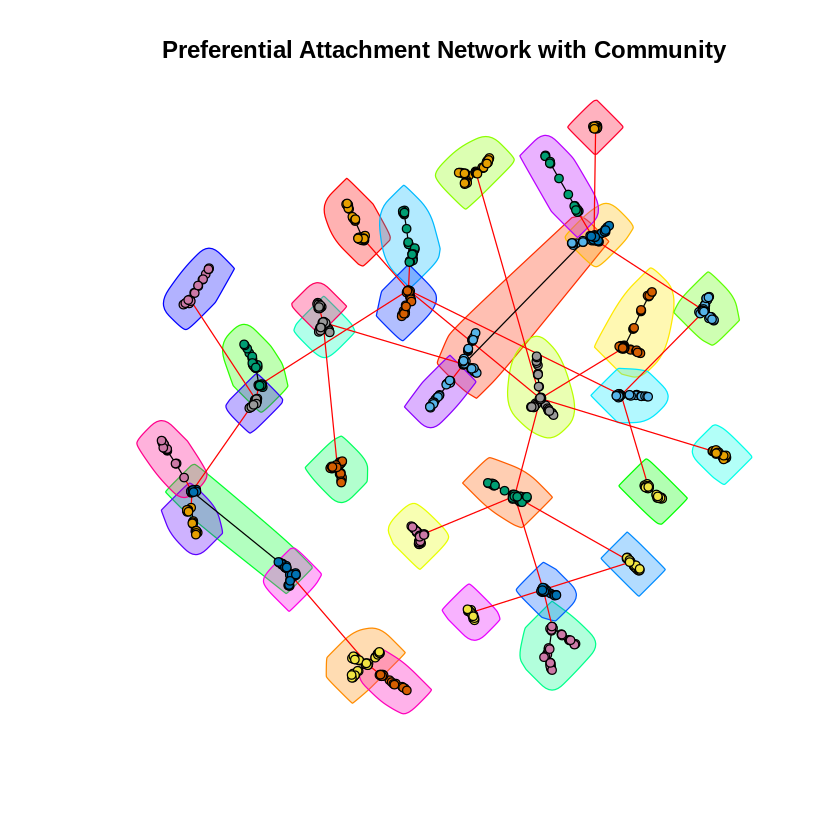

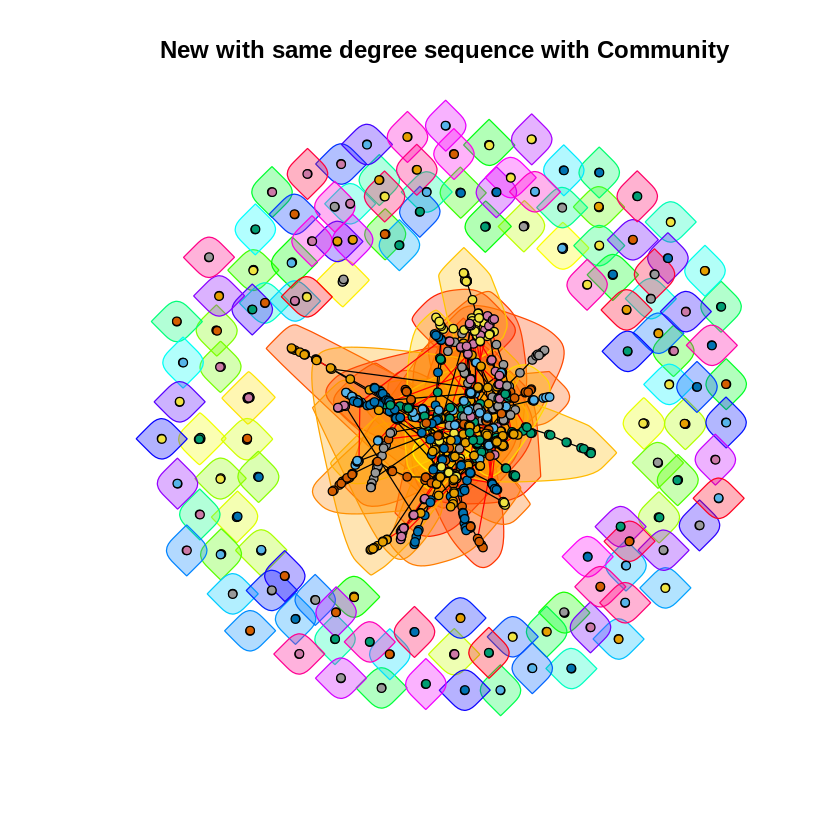

In [5]:
community_gh <- fastgreedy.community(gh)
community_gnew <- fastgreedy.community(g_new)
set.seed(1)
plot(community_gh, gh, vertex.size=3, vertex.label="", main="Preferential Attachment Network with Community")
set.seed(1)
plot(community_gnew, g_new, vertex.size=3, vertex.label="", main="New with same degree sequence with Community")


In [10]:
modularity(fastgreedy.community(gh))
modularity(fastgreedy.community(g_new))

[1] 0.9361242

[1] 0.8377305